# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

My dataset is https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric
This is a dataset about breast cancer.The Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) database is a Canada-UK Project which contains targeted sequencing data of 1,980 primary breast cancer samples.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Creating a dataframe
br_df = pd.read_csv("METABRIC_RNA_Mutation.csv",low_memory = False)


In [3]:
#Getting basic information on database and check if it has loaded
print(br_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB
None


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [4]:
# Checking number of rows and columns
br_df.shape

(1904, 693)

In [5]:
# see the first five rows
br_df.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# describe statistics
br_df.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


In [7]:
# null counts
br_df.isnull().sum()

patient_id                 0
age_at_diagnosis           0
type_of_breast_surgery    22
cancer_type                0
cancer_type_detailed      15
                          ..
hras_mut                   0
prps2_mut                  0
smarcb1_mut                0
stmn2_mut                  0
siah1_mut                  0
Length: 693, dtype: int64

In [8]:
# As the above info does not give me a clear picture about the missing values,
# sorting the null values in descending order to see missing values

counts_null = br_df.isna().sum().sort_values(ascending = False)
counts_null

tumor_stage                  501
3-gene_classifier_subtype    204
primary_tumor_laterality     106
neoplasm_histologic_grade     72
cellularity                   54
                            ... 
mmp15                          0
mmp16                          0
mmp17                          0
mmp19                          0
siah1_mut                      0
Length: 693, dtype: int64

In [9]:
# Creating a variable to see the percentage of null values in descending order
percentage_null = round(br_df.isna().mean() * 100, 1).sort_values(ascending=False)
percentage_null

tumor_stage                  26.3
3-gene_classifier_subtype    10.7
primary_tumor_laterality      5.6
neoplasm_histologic_grade     3.8
cellularity                   2.8
                             ... 
mmp15                         0.0
mmp16                         0.0
mmp17                         0.0
mmp19                         0.0
siah1_mut                     0.0
Length: 693, dtype: float64

In [10]:
# Creating and printing a table to display the null values in descending order
null_values = pd.concat([counts_null, percentage_null], axis=1, keys=["count_null", "percent_null"])
null_values.head(15)

,count_null,percent_null
tumor_stage,501,26.3
3-gene_classifier_subtype,204,10.7
primary_tumor_laterality,106,5.6
neoplasm_histologic_grade,72,3.8
cellularity,54,2.8
mutation_count,45,2.4
er_status_measured_by_ihc,30,1.6
type_of_breast_surgery,22,1.2
tumor_size,20,1.1
cancer_type_detailed,15,0.8


In [11]:
# I want more info on the clinical attributes 
# As I am not able to see the information of the columns I want to analyze, I have to drop the unrelated columns

clinical_features_to_drop = br_df.columns[31:] # dropping non clinical attributes
clinical_df = br_df.drop(clinical_features_to_drop, axis=1)
clinical_df.drop(['patient_id'],axis=1,inplace=True)
clinical_df.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [12]:
# clinical attributes
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                1904 non-null   float64
 1   type_of_breast_surgery          1882 non-null   object 
 2   cancer_type                     1904 non-null   object 
 3   cancer_type_detailed            1889 non-null   object 
 4   cellularity                     1850 non-null   object 
 5   chemotherapy                    1904 non-null   int64  
 6   pam50_+_claudin-low_subtype     1904 non-null   object 
 7   cohort                          1904 non-null   float64
 8   er_status_measured_by_ihc       1874 non-null   object 
 9   er_status                       1904 non-null   object 
 10  neoplasm_histologic_grade       1832 non-null   float64
 11  her2_status_measured_by_snp6    1904 non-null   object 
 12  her2_status                     19

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<Axes: xlabel='age_at_diagnosis', ylabel='Count'>

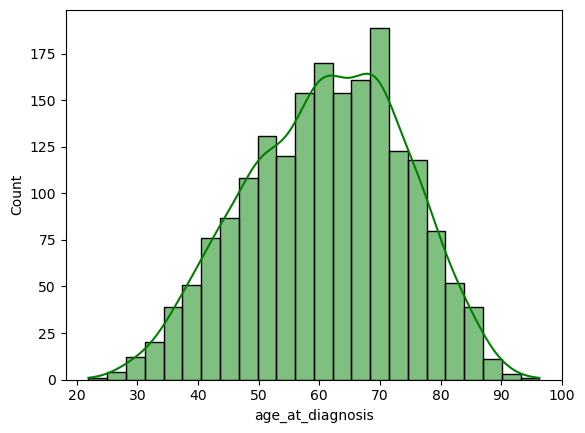

In [13]:
# Checking the distribution of age of diagnosis

sns.histplot(data=br_df, x="age_at_diagnosis", kde=True, color="green")

# distribution is normal for age of diagnosis


<Axes: >

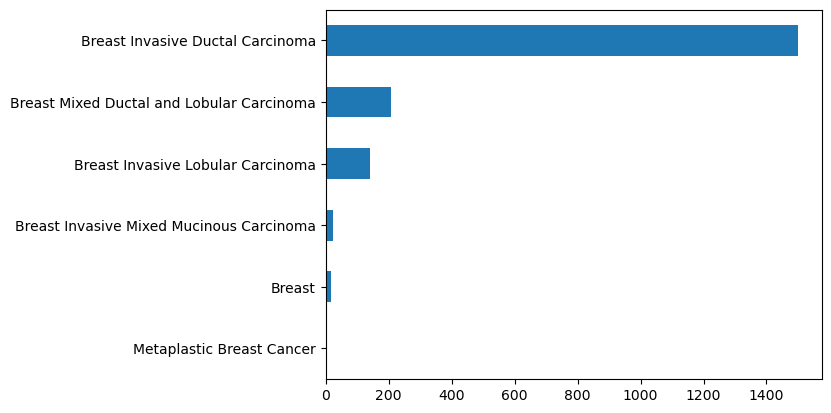

In [14]:
# Plotting the types of breast cancer
br_df['cancer_type_detailed'].value_counts().sort_values().plot(kind='barh')

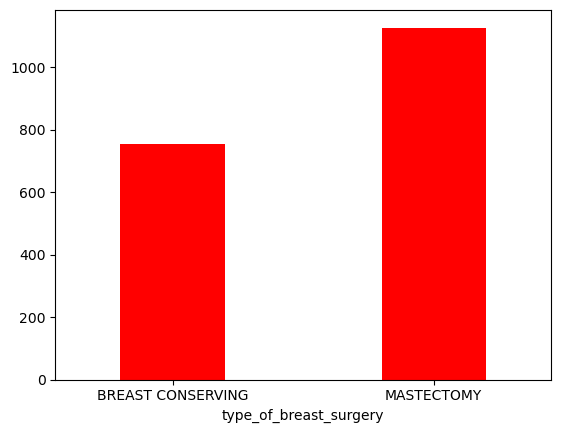

In [15]:

br_df.groupby('type_of_breast_surgery').size().plot.bar(width = 0.4, color = ['red'])
plt.xticks(rotation=0)
plt.show()

C:\Users\snigd\AppData\Local\Temp\ipykernel_32104\2686054971.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = clinical_df.corr()


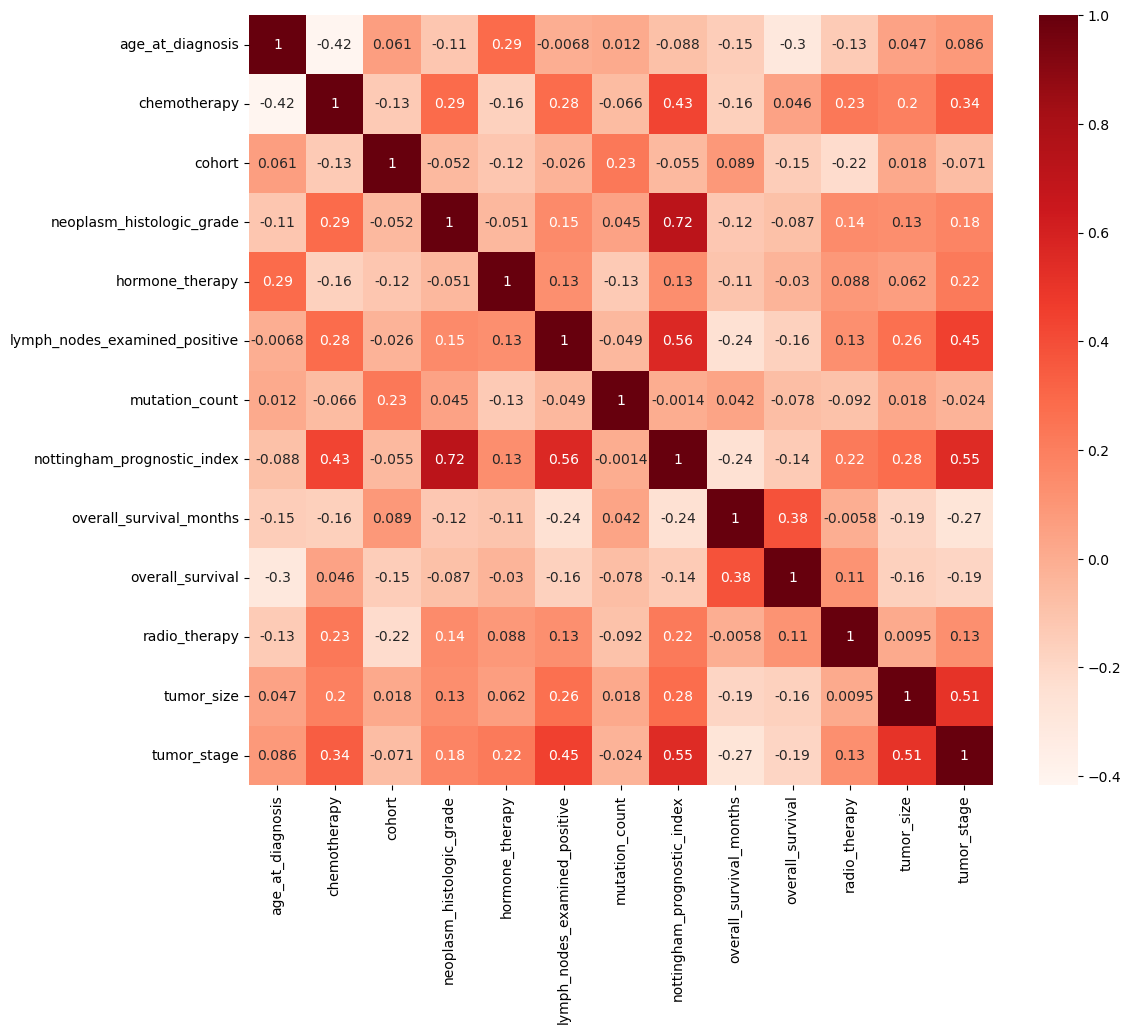

In [16]:
#Checking the heatmap for the correlation of the clinical attributes
plt.figure(figsize=(12,10))
cor = clinical_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
# It is interesting to see the level of correaltions of treatments with overall survival in months and overall survival

<Axes: xlabel='value', ylabel='count'>

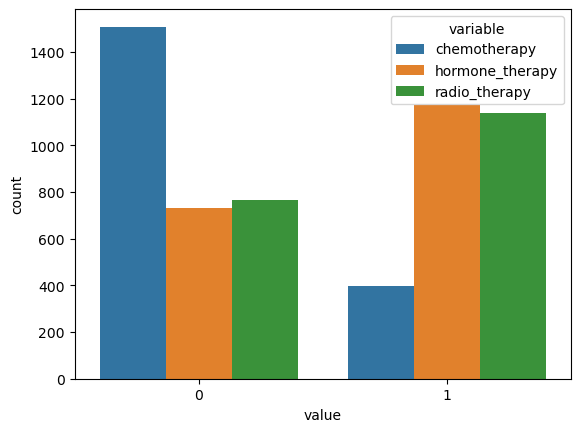

In [18]:
# Checking the count based on the treatment modality
melted = pd.melt(clinical_df, value_vars=['chemotherapy', 'hormone_therapy', 'radio_therapy'])
sns.countplot(x='value', hue='variable', data=melted)

<Axes: ylabel='Density'>

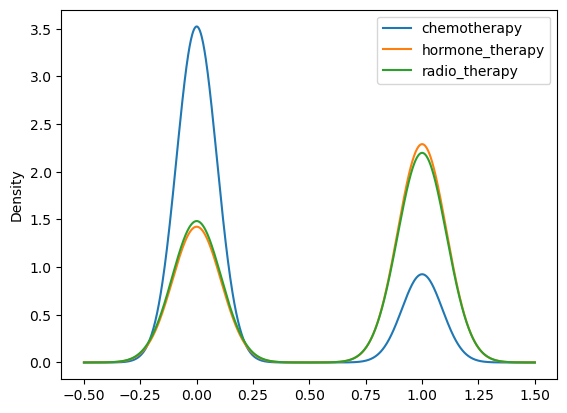

In [19]:
# distribution of treatment columns
clinical_df[["chemotherapy", "hormone_therapy", "radio_therapy"]].plot.kde()

In [ ]:
# Trying to get an idea of realtions among variables based the survival end result
#Checking distribution of the variables

sns.pairplot(
    data=clinical_df, 
    aspect= 0.85,hue ='overall_survival', palette ='deep');
#The blue dots show those who died and the orange shows those who survived

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?
There seems to bimodal distribution for the treatment columns which could be explained by the binary columns.


2. Do you have any concerns about your dataset? 
There are some columns with a possibility of repeat data. 


3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
As I want to analyze the treatment modalities related to the survival, I would start with dropping the gene columns and dealing with the null values. I may have to rename some binary columns. 



